## Введение

В этом проекте мы изучим данные по продажам компьютерных игр за период до 2016 года с целью сделать прогноз на 2017 год.

- Прежде всего мы обработаем данные, избавимся от пропусков там, где это необходимо и возможно, изучим временные периоды и решим, какой период мы будем считать актуальным для построения выводов. В индустрии игр все меняется очень быстро и данные за 1980-е, например, нам точно не помогут.

- Мы изучим, как менялся спрос на различные игровые платформы со временем, выведем топ популярных платформ за актуальный период и предположим, какие из них будут максимально прибыльны в будущем.

- Также мы изучим, какие жанры игр приносят наибольшую прибыль в изучаемом периоде, это поможет понять, на какие жанры делать акцент в будущем.

- Далее мы изучим продажи на разных территориях: в Северной Америке, Европе и Японии, выведем закономерности и проанализируем интересы пользователей, проживающих в этих регионах. Это также поможет нам в прогнозировании.

- И напоследок проверим две гипотезы:
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

По результатам исследования составим общий вывод с рекомендациями и прогнозами. Удачи мне :)

## Откроем датасет и изучим его

In [10]:
import pandas as pd
df = pd.read_csv('/datasets/games.csv')
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Предобработка данных

In [13]:
#приведем названия столбцов к нижнему регистру
df.rename(columns={'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release': 'year_of_release', 'Genre' : 'genre', \
                   'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales', \
                   'Critic_Score' : 'critic_score', 'User_Score' : 'user_score', 'Rating' : 'rating'}, inplace=True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
#посчитаем количество пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В стобцах с именем, годом и жанром количество пропусков мало, удалим эти строки. В остальных стобцах с пропусками - с рейтингом заменим медианой, с возрастной категорией пока оставим.

In [15]:
df = df.dropna(subset=['name']).reset_index(drop=True)
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df = df.dropna(subset=['genre']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [16]:
#видим, что user_score у нас имеет нечисловое значение, нужно преобразовать
df['user_score'].unique()
#ecть значение 'tbd', которое не даст нам преобразовать сразу в вещественное число, 
#попробуем узнать, сколько строк с таким значениеим
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Почти 2500 строк с таким значением, это много, просто избавляться от них я бы не стала (хотя хочется). Погуглила, tbd значит подлежит уточнению. Стало быть можно воспринимать это значение как nan и обработать это как пропуски

In [17]:
import numpy as np
df.loc[df['user_score']=="tbd", 'user_score']=np.nan
df['user_score'] = df['user_score'].astype('float64')
#теперь заменим все пропуски на медианное значение,
user_median = df['user_score'].median()
df['user_score'] = df['user_score'].fillna(user_median)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score            0
rating             6676
dtype: int64

In [18]:
#переведем year_of_release в целочисленный тип данных
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [19]:
#создаем столбец с суммой продаж по всем регионам
df['total_sales'] = df['na_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,53.58
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,7.5,NaN,36.66
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,22.76
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,21.84
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,NaN,22.49


## Исследовательский анализ данных

### Актуализируем период анализа данных

In [20]:
#посмотрим сколько игр выпускалось по годам
year_games = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
print(year_games)

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016              502


По сводной таблице видим, что до 1994 года выпускалось совсем уж мало игр, с 1994 года количество выпускаемых игр кратно увеличилось, пик пришелся на период с 2006 по 2011 годы, когда в год выпускалось более 1 тысячи игр, далее количество пошло на спад.


In [21]:
#изучим, как менялись продажи по годам
year_sales = df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
print(year_sales)

                 total_sales
year_of_release             
1980                   10.71
1981                   33.72
1982                   27.23
1983                   16.00
1984                   48.25
1985                   49.21
1986                   34.24
1987                   20.29
1988                   40.62
1989                   65.01
1990                   41.74
1991                   28.28
1992                   64.45
1993                   41.34
1994                   64.35
1995                   73.22
1996                  151.89
1997                  152.75
1998                  189.41
1999                  188.44
2000                  148.89
2001                  236.57
2002                  285.22
2003                  253.73
2004                  311.40
2005                  336.71
2006                  389.82
2007                  446.93
2008                  490.36
2009                  470.88
2010                  418.71
2011                  344.61
2012          

Согласно таблице, более менее заметные продажи компьютерных игр начались с 1996 года. До этого времени, видимо, игры были не так популярны. 

In [22]:
#посмотрим теперь продажи по платформам
platform_sales = df.pivot_table(
    index= 'platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False
                                                                       )
print(platform_sales)

          total_sales
platform             
PS2            900.93
X360           692.92
Wii            632.86
DS             614.37
PS3            604.13
PS             515.19
GBA            238.29
NES            229.90
PSP            223.91
GB             206.92
3DS            196.54
XB             191.92
SNES           181.00
N64            176.98
PS4            173.05
GC             158.41
PC             115.39
XOne           107.73
2600            81.62
WiiU            57.06
PSV             40.74
SAT             33.05
GEN             22.83
DC              14.26
SCD              1.50
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


Здесь собрана статистика по всем годам, для дальнейшего анализа предлагаю взять топ 10 платформ.

<AxesSubplot:xlabel='year_of_release'>

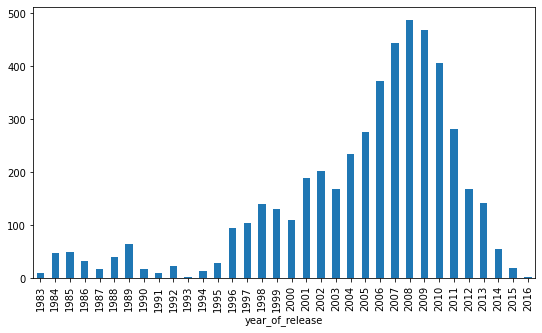

In [23]:
#создадим таблицу с топ 10 платформ и выведем список с названиями этих платформ
top_platforms_df = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
top_platforms = top_platforms_df['platform'].tolist()
#отфильтруем основной датасет по платформам, оставим только то, что касается нашего топ 10 платформ
df_top_plat = df.query('platform in @top_platforms')
#построим график по продажам по годам для топ 10 платформ
df_top_plat.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize=(9, 5))

По построенному графику наглядно видно, что до 1996 года данных в целом очень немного. Предлагаю период до 1996 года считать не актуальным

Теперь посмотрим распределение по годам для каждой из платформ в топ 10. Так мы сможем понять, какой период времени популярна та или иная платформа

<AxesSubplot:xlabel='year_of_release'>

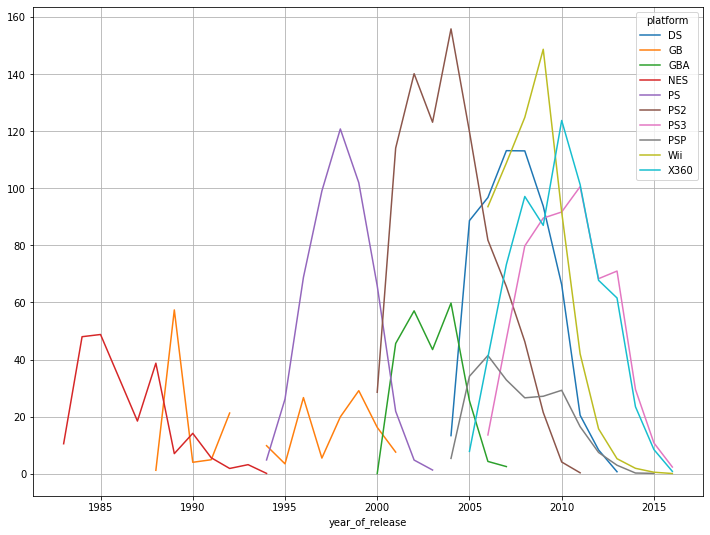

In [24]:
pd.pivot_table(
    df_top_plat, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    grid='True', figsize=(12, 9)
)

Исходя из графика видим, что срок популярности платформы составляет в среднем около 10 лет. Так или иначе, по истечении 10 лет продажи на платформе начинают сходить на нет. Пики популярности могут быть единичными, могут повторяться, может быть даже период пиковой популярности платформы. Но все это никак не влияет на срок "жизни" платформы.
Поскольку нам необходимо делать прогноз на 2017 год, то логично за актуальный период брать период с 2008 года по 2016 год, то есть за 9 предыдущих лет. Все, что было до 2008 года можно не учитывать.

In [25]:
#посмотрим, сколько игр выходило на различных платформах за выбранный нами период времени
actual_period_df = df.query('year_of_release > 2007')
actual_period_pivot = actual_period_df.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')
actual_period_pivot

year_of_release,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,
3DS,-,-,-,116.0,93.0,91.0,80.0,86.0,46.0
DC,1.0,-,-,-,-,-,-,-,-
DS,492.0,403.0,323.0,153.0,23.0,8.0,-,-,-
PC,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS2,191.0,96.0,38.0,7.0,-,-,-,-,-
PS3,138.0,162.0,181.0,215.0,148.0,126.0,108.0,73.0,38.0
PS4,-,-,-,-,-,16.0,75.0,137.0,164.0
PSP,100.0,161.0,188.0,139.0,106.0,54.0,10.0,3.0,-
PSV,-,-,-,18.0,53.0,63.0,100.0,110.0,85.0


На сводной таблице наблюдаем интересный поворот. Несмотря на вычисленную ранее продолжительность жизни платформы, период в 9 последних лет все же можно считать необоснованно большим для актуального. Мы видим, что за последние 9 лет ситуация по выходу игр на платформах сильно изменилась: некоторые платформы появились, другие напротив утратили актуальность. Я бы взяла за актуальный для прогноза период с 2013 года, именно тогда появились наиболее популярные на 2016 год платформы - PS4 и XOne

### Изучаем топ популярных платформ за период с 2013 года

In [26]:
#подкорректируем актуальный период и выведем новую сводную таблицу, только уже не с количеством игр, а с суммарными продажами
#попробуем вычислить самые потенциально прибыльные платформы
actual_period = df.query('year_of_release > 2012')
actual_period_pivot = actual_period.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value='-')
actual_period_pivot

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,41.73,35.03,22.72,12.81
DS,0.69,-,-,-
PC,4.99,4.41,2.95,1.72
PS3,70.98,29.52,10.78,2.34
PS4,14.94,53.5,67.14,37.47
PSP,2.97,0.24,0.12,-
PSV,8.02,9.45,5.56,3.86
Wii,5.25,1.89,0.52,0.07
WiiU,14.95,15.37,11.34,3.12


<AxesSubplot:xlabel='year_of_release'>

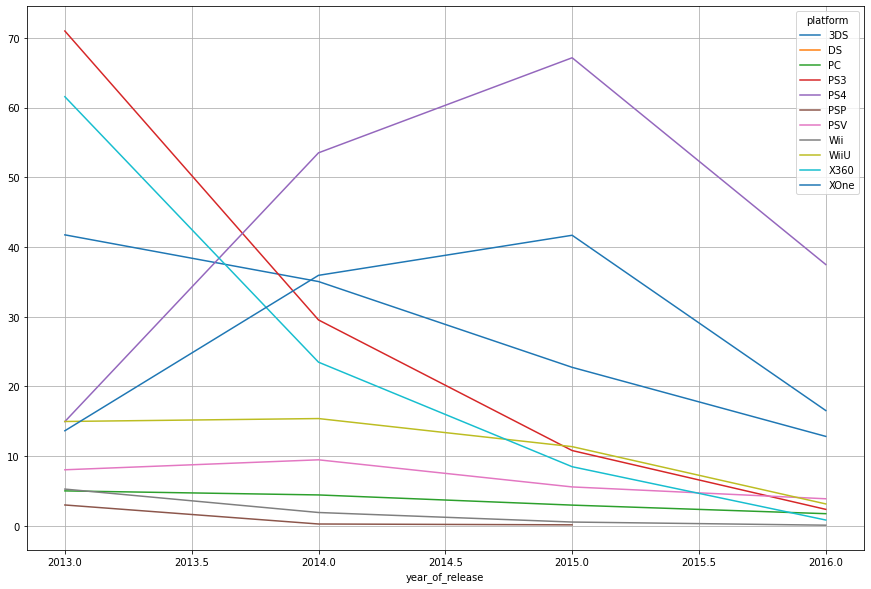

In [27]:
#для наглядности построим график
pd.pivot_table(actual_period, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(grid='True', figsize=(15,10))

В целом продажи падают на всех платформах. На такие платформы, как PS3, X360 точно ставить не нужно. Шанс повысить продажи есть у популярных платформ, а также у тех, которые не испытывали сильных падений за исследуемый период.
Наиболее перспективными мне видятся PS4 и XOne. Шансы улучшить свое положение есть также у РС, PSV и WiiU, они двигаются по графику наиболее плавно.

In [28]:
top_platform = ['PS4', 'XOne', 'PC', 'PSV', 'WiiU']
top_platforms = actual_period.query('platform in @top_platform')
#top_platforms = top_platforms.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,7.5,NaN,8.77
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,6.31
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,2.46
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,7.5,NaN,4.49
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,4.18
...,...,...,...,...,...,...,...,...,...,...,...,...
16428,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,7.5,NaN,0.01
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,7.5,NaN,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,7.5,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,7.5,NaN,0.01


Построим "ящик с усами" по продажам за актуальный период, а затем по каждой из отобранных пепрспективных платформ

count    2233.000000
mean        0.312790
std         0.783273
min         0.000000
25%         0.020000
50%         0.080000
75%         0.260000
max        11.960000
Name: total_sales, dtype: float64

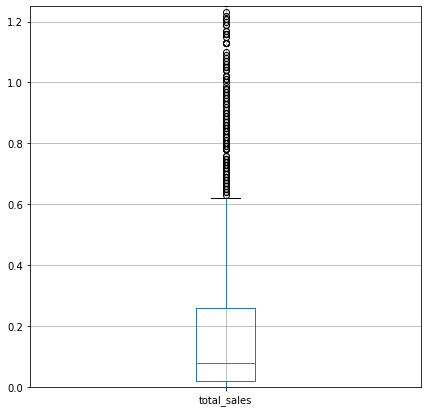

In [29]:
import matplotlib.pyplot as plt
actual_period.boxplot('total_sales', figsize=(7,7))
plt.ylim(0, 1.25)
actual_period['total_sales'].describe()

(0.0, 1.25)

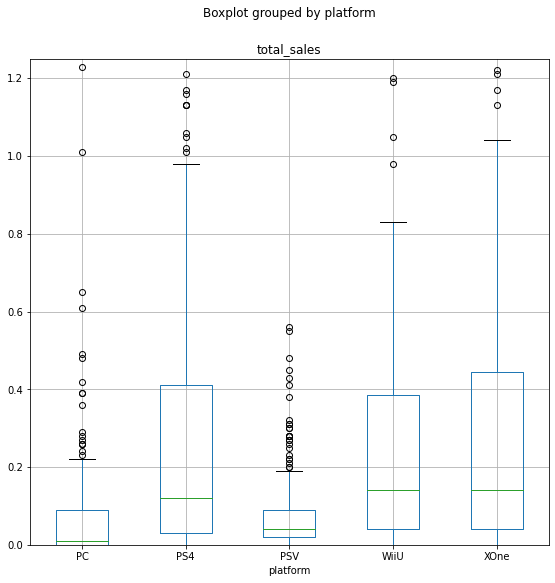

In [30]:
#строим "ящики с усами" по 5 отобранным платформам
top_platforms.boxplot('total_sales', 'platform', figsize=(9, 9))
plt.ylim(0, 1.25)

"Ящики с усами" подтверждают, что наиболее перспективными из пятерки являются PS4 и XOne
Посмотрим также суммарные продажи на платформах по годам и в целом за изучаемый период

In [31]:
top_platforms_years = top_platforms.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
top_platforms_years['all_years'] = top_platforms_years.sum(axis=1)
top_platforms_years = top_platforms_years.sort_values(by = 'all_years', ascending=False)
top_platforms_years

year_of_release,2013,2014,2015,2016,all_years
platform,,,,,
PS4,14.94,53.50,67.14,37.47,173.05
XOne,13.62,35.92,41.67,16.52,107.73
WiiU,14.95,15.37,11.34,3.12,44.78
PSV,8.02,9.45,5.56,3.86,26.89
PC,4.99,4.41,2.95,1.72,14.07


Данные за 2016 год выглядят немного странно, слишком низкие цифры. Вероятно, это данные за неполный год. В разбивке продаж по годам снова видим, что самыми перспективными платформами являются PS4 и XOne, только у этих платформ продажи растут, у остальных платформ продажи только снижаются

### Исследуем зависимость продаж от отзывов пользователей и критиков

Нам предстоит проверить, каким образом отзывы (рейтинг) пользователей и критиков влияет на суммарные продажи игр на платформах.
Пойдем по порядку от самх популярных к самым отстающим платформам

In [32]:
ps4_sales = actual_period.query('platform == "PS4"')
ps4_sales = ps4_sales[['critic_score', 'user_score', 'total_sales']]
ps4_sales

,critic_score,user_score,total_sales
31,NaN,7.5,8.77
42,97.0,8.3,6.31
77,82.0,4.3,2.46
87,NaN,7.5,4.49
92,83.0,5.7,4.18
...,...,...,...
16230,69.0,7.5,0.01
16233,NaN,7.5,0.01
16255,61.0,7.9,0.01
16259,51.0,5.5,0.01


In [33]:
ps4_sales.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.554617,0.427149
user_score,0.554617,1.000000,-0.041965
total_sales,0.427149,-0.041965,1.000000


Исходя из таблицы корреляции, трудно сказать, что есть влияение оценок критиков и игроков на продажи. Но любопытно, что есть небольшая прямая зависимость между пользовательскими оценками и оценками критиков. Кто-то у кого-то списывает)) Возможно, критики учитывают мнения игроков, а может пользователи хотят быть на одной волне с критиками.
Посмотрим зависимости на графике рассеяния

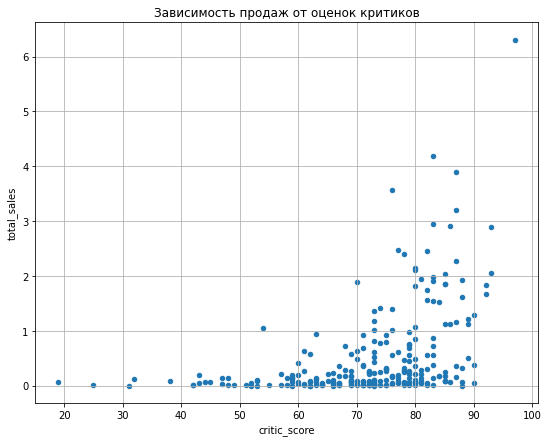

In [34]:
ps4_sales.plot(kind='scatter', x='critic_score', y='total_sales', grid=True, figsize=(9, 7))
plt.title('Зависимость продаж от оценок критиков')
plt.show()

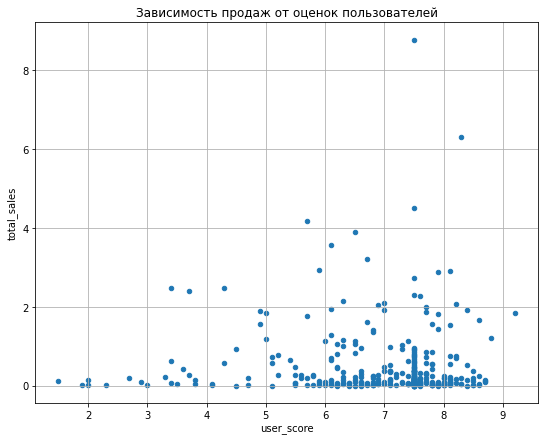

In [35]:
ps4_sales.plot(kind='scatter', x='user_score', y='total_sales', grid=True, figsize=(9, 7))
plt.title('Зависимость продаж от оценок пользователей')
plt.show()

Графики подтверждают данные, полученные с таблицы корреляции - особой зависимости между оценками и продаж нет

Изучим зависимость на других платформах

In [36]:
xone_sales = actual_period.query('platform == "XOne"')
xone_sales = xone_sales[['critic_score', 'user_score', 'total_sales']]
xone_sales.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.445451,0.392740
user_score,0.445451,1.000000,-0.104611
total_sales,0.392740,-0.104611,1.000000


На платформе XOne картина примерно такая же - зависимости практически нет. Оценки пользователей оказывают даже елезаметное отрицательное влияние.

In [37]:
wiiu_sales = actual_period.query('platform == "WiiU"')
wiiu_sales = wiiu_sales[['critic_score', 'user_score', 'total_sales']]
wiiu_sales.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.721551,0.365610
user_score,0.721551,1.000000,0.328173
total_sales,0.365610,0.328173,1.000000


С WiiU картина примерно такая же, зависимость между продажами и оценками еле прослеживается, но зато здесь более высокая зависимость между оценками критков и оценками пользователей

In [38]:
psv_sales = actual_period.query('platform == "PSV"')
psv_sales = psv_sales[['critic_score', 'user_score', 'total_sales']]
psv_sales.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.611699,0.203696
user_score,0.611699,1.000000,0.084003
total_sales,0.203696,0.084003,1.000000


На PSV зависимость между оценками и продажами вообще минимальная, еще ниже, чем у других платформ 

In [39]:
pc_sales = actual_period.query('platform == "PC"')
pc_sales = pc_sales[['critic_score', 'user_score', 'total_sales']]
pc_sales.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.424698,0.187878
user_score,0.424698,1.000000,-0.096230
total_sales,0.187878,-0.096230,1.000000


На PC тоже слабая отрицательная зависимость между оценками пользователей и продажами. В остальном картина та же, что и у других платформ

###### Вывод

По изучаемым платформам серьезной зависимости между оценками критиков и пользователей нет, корреляция в среднем на уровне 0,3. Слишком слабая, чтоб говорить о серьезной взаимосвязи 

### Изучаем популярность игр по жанрам

In [40]:
genres_sales = actual_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False) 
genres_sales

,total_sales
genre,
Action,203.74
Shooter,145.12
Role-Playing,108.92
Sports,90.13
Misc,42.78
Platform,27.05
Fighting,26.76
Racing,19.70
Adventure,15.39


In [41]:
genres_name = actual_period.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False) 
genres_name

,name
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


In [42]:
genres_sales['name'] = genres_name['name']
genres_sales

,total_sales,name
genre,,
Action,203.74,766
Shooter,145.12,187
Role-Playing,108.92,292
Sports,90.13,214
Misc,42.78,155
Platform,27.05,74
Fighting,26.76,80
Racing,19.70,85
Adventure,15.39,245


Мы вывели сводную таблицу с данными по жанрам. В ней отражены общие продажи и общее количество игр каждого жанра. 
По продажам у нас лидируют жанры Action, Shooter, Role-Playing и Sports.
По количеству выпускаемых игр лидеры Action, Role-Playing, Adventure и Shooter.
Жанр Adventure несмотря на достаточно большое количнство выпускаемых игр, приносит весьма посредственную прибыль, что может свиедетельствовать о низком спросе на этот жанр, они самые плохо продаваемые.
В то же время,  жанр Shooter выпускается не в таком количестве наименований, но находится в тройке лидеров по прибыли. По соотношению прибыли к количеству игр можно посчитать, что шутеры - самые дорогие игры.


Перепроверим полученные выводы, рассмотрев медианные и средние продажи по жанрам.

In [64]:
genres_sales = actual_period.pivot_table(index='genre', values='total_sales', \
                                         aggfunc=['sum', 'mean', 'median', 'count'])
genres_sales = genres_sales.sort_values(('median', 'total_sales'), ascending=False)
genres_sales

,sum,mean,median,count
,total_sales,total_sales,total_sales,total_sales
genre,,,,
Shooter,145.12,0.776043,0.260,187
Sports,90.13,0.421168,0.165,214
Platform,27.05,0.365541,0.125,74
Fighting,26.76,0.334500,0.115,80
Role-Playing,108.92,0.373014,0.110,292
Misc,42.78,0.276000,0.090,155
Action,203.74,0.265979,0.080,766
Puzzle,2.17,0.127647,0.060,17


Несмотря на то, что по количеству продаж жанр Action на первом месте и выглядит самым прибыльным, по медианным продажам он не вошел даже в пятерку. Шутеры лидируют и по количеству продаж и по медианным продажам, это делает этот жанр однозначным лидером. Также по медианным продажам в пятерке у нас жанры Sports, Platform, Fighting и Role-Playing.

По сравнению с выводами, основанными только лишь на общих продажах, картина существенно изменилась.

## Создаем портрет пользователя каждого региона

### Топ-5 платформ

In [43]:
na_platforms = actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_platforms.head()

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


Вывели 5 самых популярных платформ в Северной Америке : PS4, Xone, X360, PS3, 3DS

In [44]:
eu_platforms = actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_platforms.head()

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


Вывели 5 самых популярных платформ в Европе : PS4, PS3, Xone, X360, 3DS

In [45]:
jp_platforms = actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_platforms.head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Вывели 5 самых популярных платформ в Японии: 3DS, PS3, PSV, PS4, WiiU

###### Вывод
В Северной Америке и Европе предпочитают одни и те же платформы, однако, в Европе PS3 все еще популярна, в отличие от Америки, где на ней играет меньшинство.
У японских пользователей картина совссем иная - лидирующую позицию занимает 3DS, аутсайдер среди пользователь Америки и Европы, PS3 также все еще очень популярен. Кроме того, в пятерку самых популярных вошли PSV и WiiU, которые вообще не вошли в топ Америки и Европы

### Топ-5 жанров

In [46]:
na_genres = actual_period.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_genres.head()

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


Вывели топ-5 жанров Северной Америки: Action, Shooter, Sports, Role-Playing, Misc (кажется, мы ранее не заметили ошибку в названии жанра, предполагаю, последний жанр - Music)

In [47]:
eu_genres = actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_genres.head()

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


Вывели топ-5 жанров Европы: Action, Shooter, Sports, Role-Playing, Racing

In [48]:
jp_genres = actual_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_genres.head()

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


Вывели топ-5 жанров Японии: Role-Playing, Action, Music, Fighting, Shooter

###### Вывод
Также, как и с платформами, пользователи Северной Америки и Европы в основном предпочитают одни и те же жанры. Единственная разница - на последнем месте в Америке музыка, а в Европе гонки. В остальном распределение популярных жанров идентично
С Японией снова дела обстоят несколько иначе: самыц популярный жанр - ролевые, любимые на западе шутеры замыкают топ и появляеься жанр драк, который не входит в топы Европы и Америки. Японцы, как и американцы любят музыкальные игры.

### Влияние рейтинга ESRB на продажи

In [49]:
actual_period['rating'].unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

In [50]:
#Северная Америка
na_esrb = actual_period.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_esrb

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


In [51]:
#Европа
eu_esrb = actual_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_esrb

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


In [52]:
#Япония
jp_esrb = actual_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_esrb

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


Для начала расшифруем значения рейтинга:

М - для лиц старше 17

Е - для всех возрастных категорий

Е 10+ - для лиц старше 10

Т - для лиц старше 13

В Америке и Европе ситуация абсолютно идентичная. Самые популярные игры для лиц старше 17, наименее популярные - игры для лиц старше 13 лет. На втором месте во всех регионах игры без возрастных ограничений.
В Японии самые популярные игры для лиц старше 13 лет.

Такое распределение может свидетельствовать о том, что средний возраст геймеров в Америке и Европе выше, чем в Японии. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [53]:
#для начала высчитаем средние пользовательские рейтинги
xone_mean = actual_period.query('platform == "XOne"')['user_score'].mean()
pc_mean = actual_period.query('platform == "PC"')['user_score'].mean()
print('Средний пользовательский рейтинг XOne:', xone_mean)
print('Средний пользовательский рейтинг PC:', pc_mean)

Средний пользовательский рейтинг XOne: 6.778947368421053
Средний пользовательский рейтинг PC: 6.49100529100529


In [54]:
#высчитаем дисперсии рейтингов
import numpy as np
xone = actual_period.query('platform == "XOne"')['user_score'].to_list()
pc = actual_period.query('platform == "PC"')['user_score'].to_list()
xone_var = np.var(xone)
pc_var = np.var(pc)
print('Диспепрсия пользовательского рейтинга XOne:', xone_var)
print('Диспепрсия пользовательского рейтинга PC:', pc_var)

Диспепрсия пользовательского рейтинга XOne: 1.5831195397400384
Диспепрсия пользовательского рейтинга PC: 2.6970090423000475


Мы выдвигаем следующие гипотезы:

Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

Н1: Средние пользовательские рейтинги платформ Xbox One и PC различны

In [55]:
#дисперсии сильно отличаются, в тестах нужно добавить аргумент equal_var
#используем st.ttest_ind, т.к. у нас расчет равенста среднего двух генеральных совокупностей по выборкам
from scipy import stats as st
alpha = 0.01
results = st.ttest_ind(xone, pc, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.04657158430650933
Не получилось отвергнуть нулевую гипотезу


Исходя из результатов теста, средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Результаты теста подтверждаются средними значениями, выведенными нами в начале: 6,7 и 6,5.

Пользовательские оценки этих двух платформ в основном равны

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [56]:
#для начала высчитаем средние пользовательские рейтинги
action_mean = actual_period.query('genre == "Action"')['user_score'].mean()
sports_mean = actual_period.query('genre == "Sports"')['user_score'].mean()
print('Средний пользовательский рейтинг Action:', action_mean)
print('Средний пользовательский рейтинг Sports:', sports_mean)

Средний пользовательский рейтинг Action: 7.163577023498694
Средний пользовательский рейтинг Sports: 5.808878504672896


In [57]:
#высчитаем дисперсии рейтингов
action = actual_period.query('genre == "Action"')['user_score'].to_list()
sports = actual_period.query('genre == "Sports"')['user_score'].to_list()
action_var = np.var(action)
sports_var = np.var(sports)
print('Диспепрсия пользовательского рейтинга Action:', action_var)
print('Диспепрсия пользовательского рейтинга Sports:', sports_var)

Диспепрсия пользовательского рейтинга Action: 1.0059187975921848
Диспепрсия пользовательского рейтинга Sports: 3.3283791160800074


Мы выдвигаем следующие гипотезы:

Н0: Средние пользовательские рейтинги жанров Action и Sports различны

Н1: Средние пользовательские рейтинги жанров Action и Sports одинаковы


In [58]:
#дисперсии сильно отличаются, в тестах нужно добавить аргумент equal_var
#используем st.ttest_ind, т.к. у нас расчет равенста среднего двух генеральных совокупностей по выборкам
alpha = 0.01
results = st.ttest_ind(action, sports, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.6150491502015005e-21
Не получилось отвергнуть нулевую гипотезу


Исходя из результатов теста, средние пользовательские рейтинги жанров Action и Sports различаются. Результаты теста подтверждаются средними значениями, выведенными нами в начале: 7,1 и 5,8.

Пользовательские оценки этих двух жанров в основном различны

## Общий вывод

Проанализировав предложенный датасет приходим к следующим выводам:
- акутальный период для прогнозов составляет последние 3-4 года, рынок меняется очень быстро;
- срок "жизни" актуальной платформы около 10 лет;
- оценки критиков и пользователей не слишком влияют на продажи игр, однако, они влияют друг на друга;
- самые популярные жанры игр это Action, Shooter и Role-Playing. Причем жанр Shooter представлен меньшим количеством игр, но продажи у него на втором месте;
- наибольшую прибыльность показывают следующие жанры: Shooter, Sports, Platform, Fighting и Role-Playing;
- консоли имеют больше перспектив, чем ПК. Самые перспективные платформы: PS4, XOne;
- пользователи в Америке и Европе не отличаются между собой по предпочтениям в играх, однако японские игроки сильно отличаются от западных. При планировании продаж необходимо учитывать регион и особенности предпочтейний его жителей;
- средние пользовательстке рейтинги XOne и PC одинаковы;
- средние пользовательстке рейтинги жанра  Action и Sports различны. Причем средние рейтинги жанра Action выше рейтингов жанра Sports.

Что можно порекомендовать:
- ставку нужно делать на игровые консоли, в основном на PS4, XOne;
- жанр Action самый популярный вне зависимости от региона, Shooter тоже заслуживает внимания;
- с точки зрения прибыльности стоит обратить внимание на жанры Shooter, Sports, Platform, Fighting и Role-Playing;
- при разработке игр и планировании рекламных компаний необходимо изучать пользовательские предпочтения в том или ином регионе, так как они могут сильно отличаться в зависимости от части света, где планируются продажи.
